In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 
# Split into test and training data

In [3]:
train_images.shape  # we have 60000 images, 28 picels each

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

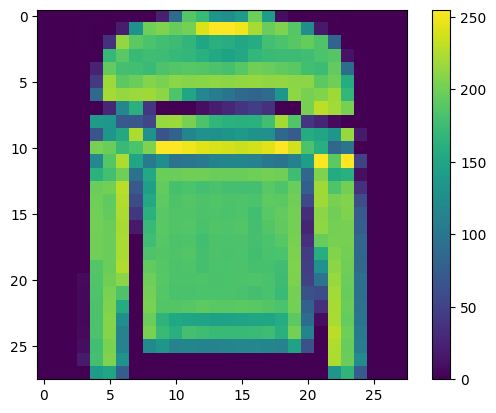

In [7]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

# to see images

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#preprocessing

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Metal device set to: Apple M2


2023-01-25 20:48:19.869112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-25 20:48:19.870100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10


2023-01-25 20:48:24.078836: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-25 20:48:24.222722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4956 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3340 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3108 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2802 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2402 - accurac

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

  1/313 [..............................] - ETA: 1:20 - loss: 0.4146 - accuracy: 0.8438

2023-01-25 20:53:11.196942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8686
Test accuracy: 0.868600070476532


In [13]:
predictions = model.predict(test_images)

127/313 [===========>..................] - ETA: 0s

2023-01-25 20:53:21.360844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [14]:
predictions[0]

array([1.0552637e-06, 5.1742059e-11, 1.5906748e-08, 7.3817463e-09,
       7.2536290e-07, 5.6572957e-04, 5.4991142e-07, 8.7018590e-03,
       1.5743827e-06, 9.9072850e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

Pick a number: 10
1/1 [==============================] - 0s 15ms/step


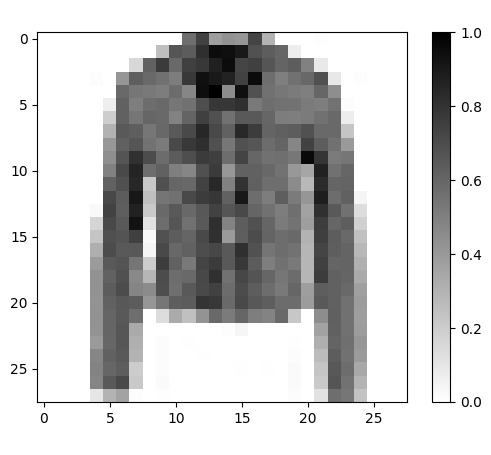

4


In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
print(test_labels[num])
